In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size

In [2]:
T = 80

# parameters
𝛼0 = 10.0
𝛼1 = 1.53
𝛼2 = -.9

y_1 = 28. # y_{-1}
y0 = 24.

In [3]:
A = np.identity(T)  # The T x T identity matrix

for i in range(T):

    if i-1 >= 0:
        A[i, i-1] = -𝛼1

    if i-2 >= 0:
        A[i, i-2] = -𝛼2

b = np.full(T, 𝛼0)
b[0] = 𝛼0 + 𝛼1 * y0 + 𝛼2 * y_1
b[1] = 𝛼0 + 𝛼2 * y0

In [4]:
A, b

(array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [-1.53,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.9 , -1.53,  1.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ..., -1.53,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.9 , -1.53,  1.  ]]),
 array([ 21.52, -11.6 ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10

In [5]:
A_inv = np.linalg.inv(A)

y = A_inv @ b

In [6]:
y_second_method = np.linalg.solve(A, b)

In [7]:
np.allclose(y, y_second_method)

True

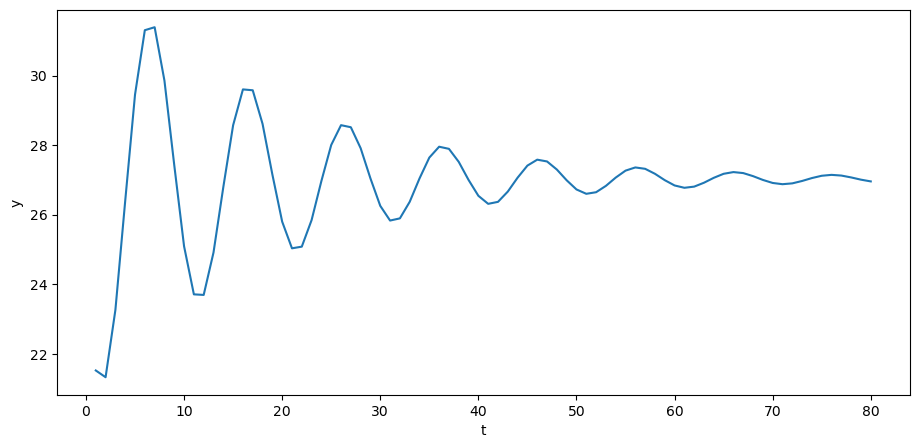

In [8]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

In [9]:
y_star = 𝛼0 / (1 - 𝛼1 - 𝛼2)
y_1_steady = y_star # y_{-1}
y0_steady = y_star

b_steady = np.full(T, 𝛼0)
b_steady[0] = 𝛼0 + 𝛼1 * y0_steady + 𝛼2 * y_1_steady
b_steady[1] = 𝛼0 + 𝛼2 * y0_steady

In [10]:
y_steady = A_inv @ b_steady

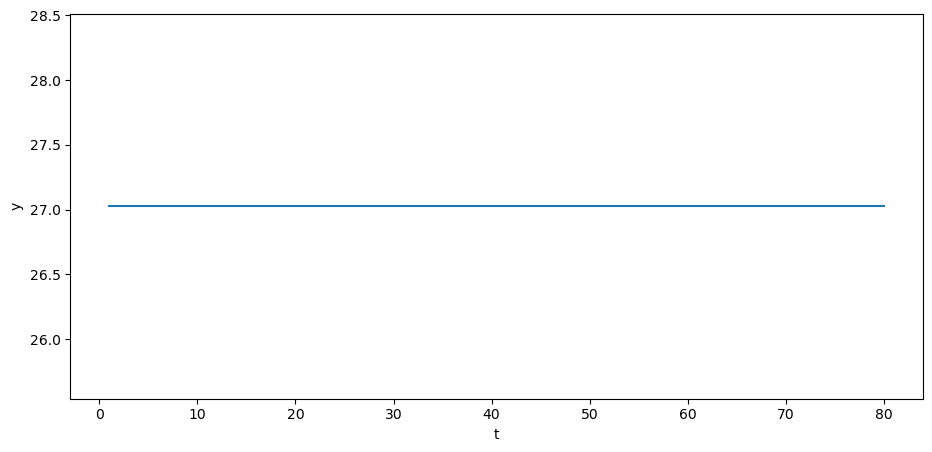

In [11]:
plt.plot(np.arange(T)+1, y_steady)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

In [12]:
𝜎u = 2.

In [13]:
u = np.random.normal(0, 𝜎u, size=T)
y = A_inv @ (b + u)

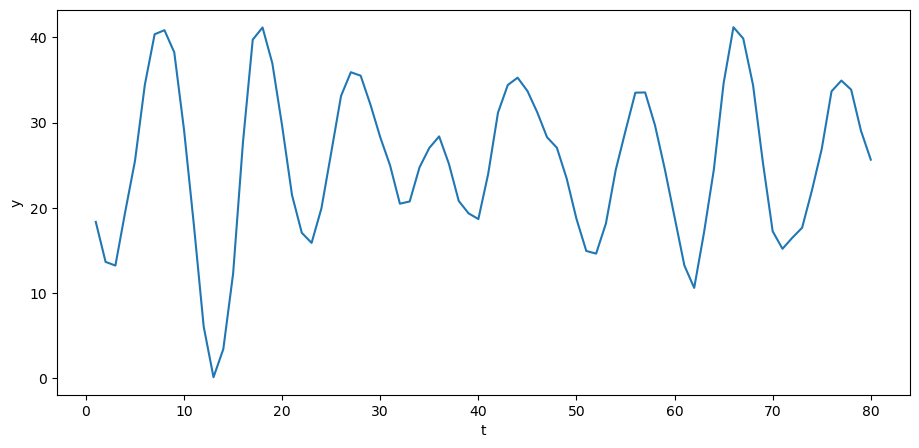

In [14]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

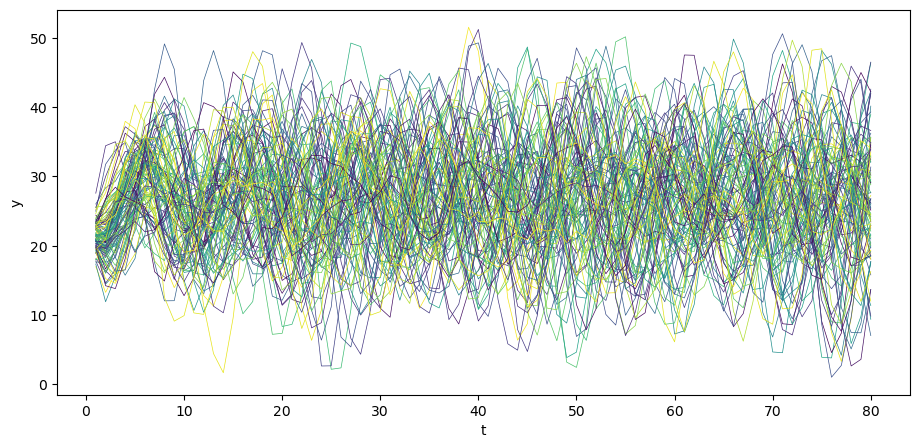

In [15]:
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # Choose a random color from viridis
    u = np.random.normal(0, 𝜎u, size=T)
    y = A_inv @ (b + u)
    plt.plot(np.arange(T)+1, y, lw=0.5, color=col)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

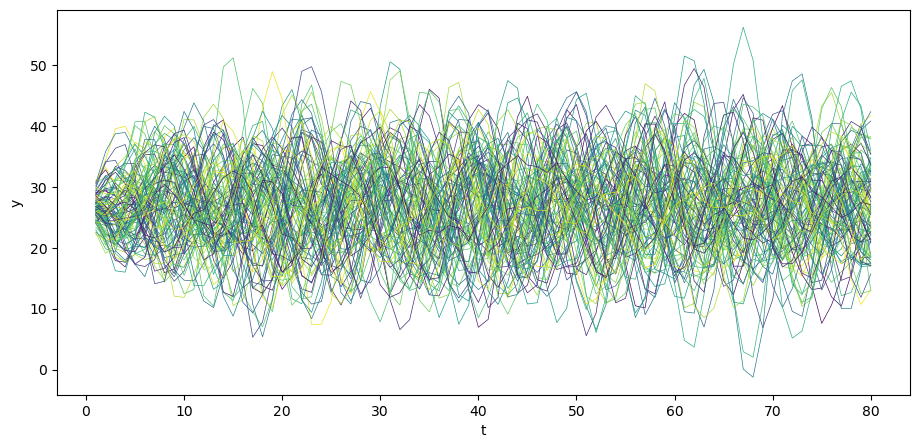

In [16]:
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # Choose a random color from viridis
    u = np.random.normal(0, 𝜎u, size=T)
    y_steady = A_inv @ (b_steady + u)
    plt.plot(np.arange(T)+1, y_steady, lw=0.5, color=col)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

In [17]:
class population_moments:
    """
    Compute population moments mu_y, Sigma_y.
    ---------
    Parameters:
    alpha0, alpha1, alpha2, T, y_1, y0
    """
    def __init__(self, alpha0, alpha1, alpha2, T, y_1, y0, sigma_u):

        # compute A
        A = np.identity(T)

        for i in range(T):
            if i-1 >= 0:
                A[i, i-1] = -alpha1

            if i-2 >= 0:
                A[i, i-2] = -alpha2

        # compute b
        b = np.full(T, alpha0)
        b[0] = alpha0 + alpha1 * y0 + alpha2 * y_1
        b[1] = alpha0 + alpha2 * y0

        # compute A inverse
        A_inv = np.linalg.inv(A)

        self.A, self.b, self.A_inv, self.sigma_u, self.T = A, b, A_inv, sigma_u, T
    
    def sample_y(self, n):
        """
        Give a sample of size n of y.
        """
        A_inv, sigma_u, b, T = self.A_inv, self.sigma_u, self.b, self.T
        us = np.random.normal(0, sigma_u, size=[n, T])
        ys = np.vstack([A_inv @ (b + u) for u in us])

        return ys

    def get_moments(self):
        """
        Compute the population moments of y.
        """
        A_inv, sigma_u, b = self.A_inv, self.sigma_u, self.b

        # compute mu_y
        self.mu_y = A_inv @ b
        self.Sigma_y = sigma_u**2 * (A_inv @ A_inv.T)

        return self.mu_y, self.Sigma_y


my_process = population_moments(
    alpha0=10.0, alpha1=1.53, alpha2=-.9, T=80, y_1=28., y0=24., sigma_u=1)
    
mu_y, Sigma_y = my_process.get_moments()
A_inv = my_process.A_inv

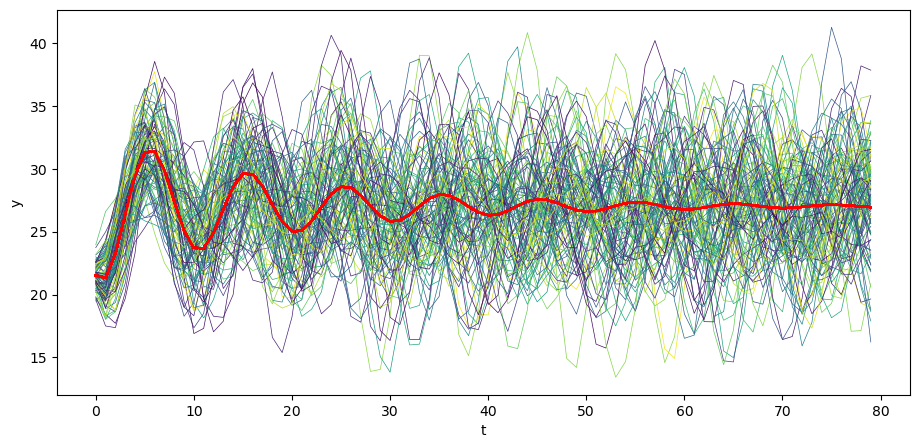

In [18]:
# plot mean
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # Choose a random color from viridis
    ys = my_process.sample_y(N)
    plt.plot(ys[i,:], lw=0.5, color=col)
    plt.plot(mu_y, color='red')

plt.xlabel('t')
plt.ylabel('y')

plt.show()

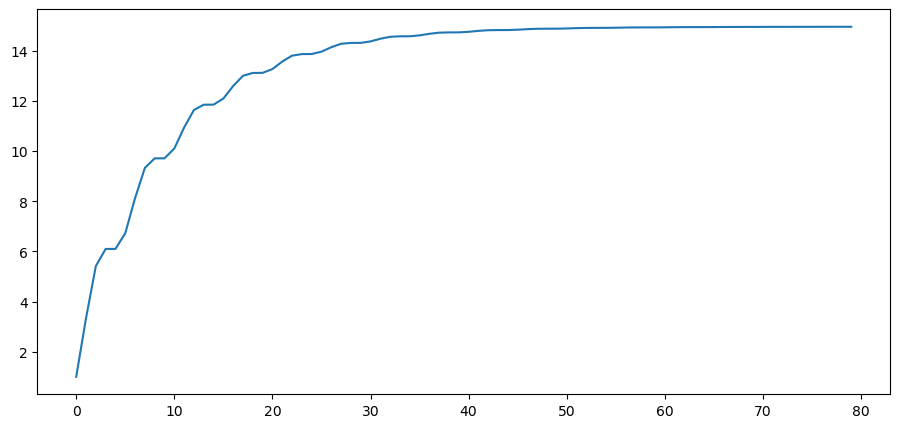

In [19]:
# plot variance
plt.plot(Sigma_y.diagonal())
plt.show()

In [20]:
my_process = population_moments(alpha0=0, alpha1=.8, alpha2=0, T=6, y_1=0., y0=0., sigma_u=1)
    
mu_y, Sigma_y = my_process.get_moments()
print("mu_y = ",mu_y)
print("Sigma_y = ", Sigma_y)

mu_y =  [0. 0. 0. 0. 0. 0.]
Sigma_y =  [[1.         0.8        0.64       0.512      0.4096     0.32768   ]
 [0.8        1.64       1.312      1.0496     0.83968    0.671744  ]
 [0.64       1.312      2.0496     1.63968    1.311744   1.0493952 ]
 [0.512      1.0496     1.63968    2.311744   1.8493952  1.47951616]
 [0.4096     0.83968    1.311744   1.8493952  2.47951616 1.98361293]
 [0.32768    0.671744   1.0493952  1.47951616 1.98361293 2.58689034]]


In [21]:
mu_y, Sigma_y = my_process.get_moments()
print("bottom right corner of Sigma_y = \n", Sigma_y[72:,72:])

bottom right corner of Sigma_y = 
 []


In [22]:
with np.printoptions(precision=3, suppress=True):
    print(A_inv[0:7,0:7])

[[ 1.     0.    -0.    -0.     0.    -0.    -0.   ]
 [ 1.53   1.    -0.    -0.     0.    -0.    -0.   ]
 [ 1.441  1.53   1.     0.     0.     0.     0.   ]
 [ 0.828  1.441  1.53   1.     0.     0.     0.   ]
 [-0.031  0.828  1.441  1.53   1.    -0.    -0.   ]
 [-0.792 -0.031  0.828  1.441  1.53   1.     0.   ]
 [-1.184 -0.792 -0.031  0.828  1.441  1.53   1.   ]]


In [23]:
with np.printoptions(precision=3, suppress=True):
    print(A_inv[72:,72:])

[[ 1.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 1.53   1.    -0.    -0.     0.    -0.    -0.    -0.   ]
 [ 1.441  1.53   1.     0.     0.     0.     0.     0.   ]
 [ 0.828  1.441  1.53   1.     0.     0.     0.     0.   ]
 [-0.031  0.828  1.441  1.53   1.    -0.    -0.    -0.   ]
 [-0.792 -0.031  0.828  1.441  1.53   1.     0.     0.   ]
 [-1.184 -0.792 -0.031  0.828  1.441  1.53   1.     0.   ]
 [-1.099 -1.184 -0.792 -0.031  0.828  1.441  1.53   1.   ]]


In [24]:
𝛽 = .96

In [25]:
# construct B
B = np.zeros((T, T))

for i in range(T):
    B[i, i:] = 𝛽 ** np.arange(0, T-i)

In [26]:
B

array([[1.        , 0.96      , 0.9216    , ..., 0.04314048, 0.04141486,
        0.03975826],
       [0.        , 1.        , 0.96      , ..., 0.044938  , 0.04314048,
        0.04141486],
       [0.        , 0.        , 1.        , ..., 0.04681041, 0.044938  ,
        0.04314048],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.96      ,
        0.9216    ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.96      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [27]:
𝜎u = 0.
u = np.random.normal(0, 𝜎u, size=T)
y = A_inv @ (b + u)
y_steady = A_inv @ (b_steady + u)

In [28]:
p = B @ y

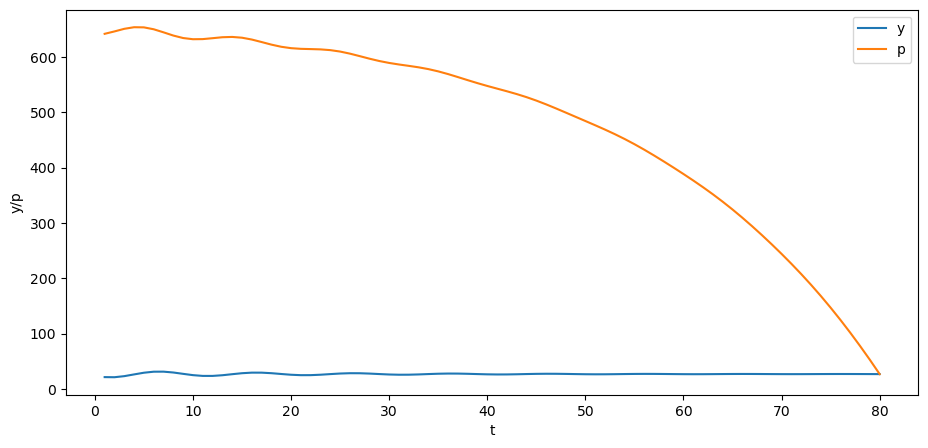

In [29]:
plt.plot(np.arange(0, T)+1, y, label='y')
plt.plot(np.arange(0, T)+1, p, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()

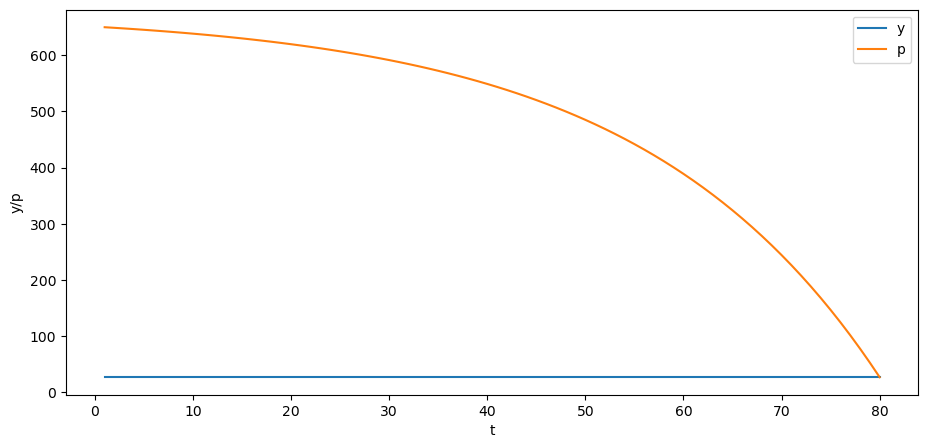

In [30]:
p_steady = B @ y_steady

plt.plot(np.arange(0, T)+1, y_steady, label='y')
plt.plot(np.arange(0, T)+1, p_steady, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()